# Housing Price Prediction - Assignment Solution

<img src="banner.png" width='100%' />

## Table of Contents

1. [Introduction](#Section1)
2. [Goals](#Section2)
3. [Importing libraries](#Section3)    
4. [Data Loading and data Description](#Section4)    
5. [Data Understanding and Exploration](#Section5)        
6. [Data Cleaning](#Section6)
    - 6.1 [Removing columns with maximum missing data](#Section601)
    - 6.2 [Filling missing data with mean/mode of their respective column](#Section602)
    - 6.3 [Finding and removing outliers](#Section603)
7. [Feature engineering](#Section7)
8. [Improving data quality](#Section8)
    - 8.1 [Creating dummies](#Section801)
    - 8.2 [Label Encoding](#Section802)
9.  [Splitting data into training and evaluation sets](#Section9)
10. [Feature Scaling](#Section10)
11. [Building the Model](#Section11)
12. [Model Evaluation Metrics](#Section12)

<a id = Section1></a>
## 1. Introduction 

I am going to do a detailed statistical analysis of __Housing Price Prediction__ data set along with Machine learning models. I will also inclue visualizations to explain analysis and the machine learning models will be used to predict housing price. Let's get started.

* Data Loading and data Description
* Data Understanding and Exploration
* Data cleaning
* Feature Engineering
* Improving data quality
* Splitting data into training and evaluation sets
* Feature Scaling
* Model building and 
* Evaluation

<a id = Section2></a>
## 2. Goals

__There are two primary goals of this kernel.__

* To do a statistical and exploratory data analysis of housing prices.
* And to create machine learning models that can predict the chances of passengers survival.


<a id = Section3></a>
## 3. Importing libraries

Python modules can get access to code from another module by importing the file/function using import.

In [93]:
import pandas as pd
import numpy as np
import scipy.stats as stats

# Plotting library for Python programming language and it's numerical mathematics extension NumPy
import matplotlib.pyplot as plt
%matplotlib inline

params = {'legend.fontsize': 'large',
          'figure.figsize': (18.5, 10.5),
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
plt.rcParams.update(params)

# Provides a high level interface for drawing attractive and informative statistical graphics
import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.

import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import plotly.figure_factory as ff
from plotly import subplots
from plotly.subplots import make_subplots
init_notebook_mode(connected=True)

from datetime import date, datetime,timedelta

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
import os

<a id = Section4></a>
## 4. Data Loading and data Description

In [94]:
## The below dataset is the modified version of the originally uploaded initial data
df = pd.read_csv('house_data.csv')

In [95]:
##Looking at data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [96]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<a id = Section5></a>
## 5. Data Understanding and Exploration

In [ ]:
#correlation matrix
corrmat = df.corr()
sns.heatmap(corrmat, vmax=.8, square=True);

In [6]:
cor = df.corr(method ='kendall')
cor

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.014198,-0.022489,-0.003550,-0.020898,0.002698,-0.004035,-0.008415,-0.026222,-0.009105,-0.005545,-0.006501,-0.022232,-0.000301,0.006823,-0.023080,0.002175,0.003751,-0.017531,0.005745,0.002064,0.032048,0.006189,0.018760,-0.010813,-0.000457,0.009987,0.004082,-0.031211,-0.002009,-0.005360,-0.029802,0.004762,0.045303,-0.035251,0.013966,0.001326,-0.012030
MSSubClass,0.014198,1.000000,-0.236067,-0.200790,0.083506,-0.057833,0.010922,-0.003649,0.018061,-0.079554,-0.071900,-0.086258,-0.234613,-0.201798,0.405345,0.066860,0.141142,-0.037486,0.002230,0.169025,0.250498,0.064922,0.244957,0.133565,0.016988,0.052619,0.019290,-0.035341,0.018110,0.025413,0.010590,-0.031583,-0.018751,0.029447,-0.028830,0.014059,-0.021802,-0.003979
LotFrontage,-0.022489,-0.236067,1.000000,0.510666,0.193309,-0.065029,0.138978,0.083595,0.197848,0.112092,0.042690,0.082474,0.274099,0.306016,0.042451,-0.024931,0.261243,0.070795,-0.003209,0.180774,0.079747,0.259606,0.001819,0.277150,0.198863,0.081254,0.278278,0.263120,0.080382,0.129485,-0.075647,0.052914,0.035484,0.069963,0.019833,0.018147,0.002403,0.290361
LotArea,-0.003550,-0.200790,0.510666,1.000000,0.173136,-0.036164,0.074436,0.053329,0.132267,0.120827,0.057501,0.052923,0.252669,0.311072,0.086576,-0.016481,0.304676,0.077897,0.037564,0.190968,0.116139,0.267224,-0.018601,0.303366,0.279682,0.030517,0.264666,0.247904,0.133455,0.126485,-0.051719,0.050724,0.074070,0.068907,0.048161,0.004481,-0.020255,0.314174
OverallQual,-0.020898,0.083506,0.193309,0.173136,1.000000,-0.152513,0.505804,0.437687,0.341051,0.104062,-0.101893,0.205094,0.349043,0.307490,0.244571,-0.030355,0.464189,0.087385,-0.045162,0.513944,0.265575,0.104216,-0.171960,0.351349,0.365010,0.474646,0.543120,0.424225,0.209439,0.346309,-0.139530,0.029395,0.040856,0.050609,-0.078040,0.047233,-0.020327,0.669660
OverallCond,0.002698,-0.057833,-0.065029,-0.036164,-0.152513,1.000000,-0.329379,-0.031641,-0.149822,-0.012308,0.092477,-0.096586,-0.168321,-0.128240,0.000915,0.036670,-0.118681,-0.048669,0.107635,-0.241425,-0.065978,-0.003477,-0.092452,-0.087672,-0.040712,-0.295814,-0.226809,-0.156301,-0.035247,-0.107522,0.097942,0.029930,0.068009,-0.005175,0.079860,-0.005585,0.042257,-0.103492
YearBuilt,-0.004035,0.010922,0.138978,0.074436,0.505804,-0.329379,1.000000,0.624893,0.300645,0.151742,-0.090010,0.087547,0.296103,0.203002,0.013822,-0.119523,0.191389,0.132515,-0.054524,0.437111,0.199885,-0.026412,-0.128044,0.130910,0.137551,0.838521,0.491814,0.381106,0.204089,0.284283,-0.324028,0.018436,-0.058717,0.007335,-0.075164,0.012968,-0.009402,0.470960
YearRemodAdd,-0.008415,-0.003649,0.083595,0.053329,0.437687,-0.031641,0.624893,1.000000,0.176332,0.051501,-0.101920,0.120251,0.208188,0.166878,0.053741,-0.053443,0.189392,0.082374,-0.026191,0.353315,0.124720,-0.042953,-0.128114,0.146455,0.095041,0.644826,0.371014,0.282788,0.165740,0.255900,-0.187786,0.042759,-0.037362,0.002328,-0.074961,0.015121,0.034830,0.412955
MasVnrArea,-0.026222,0.018061,0.197848,0.132267,0.341051,-0.149822,0.300645,0.176332,1.000000,0.187837,-0.053776,0.056767,0.272309,0.265345,0.048327,-0.096169,0.244998,0.108805,0.029618,0.259883,0.151512,0.098055,-0.044559,0.216962,0.224180,0.227015,0.346929,0.276531,0.144636,0.167763,-0.156450,0.036891,0.033783,0.004388,-0.044981,0.013728,0.000542,0.321250
BsmtFinSF1,-0.009105,-0.079554,0.112092,0.120827,0.104062,-0.012308,0.151742,0.051501,0.187837,1.000000,0.036774,-0.412606,0.311853,0.239716,-0.144424,-0.066692,0.039623,0.573172,0.076902,0.010347,-0.011699,-0.067277,-0.090166,-0.037727,0.156498,0.066580,0.152819,0.179541,0.133494,0.059288,-0.121551,0.039480

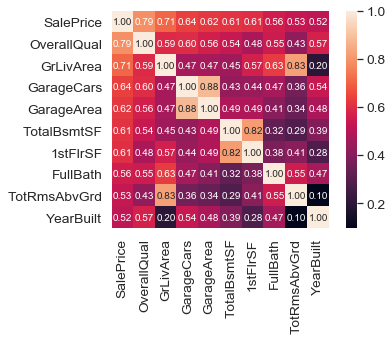

In [7]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

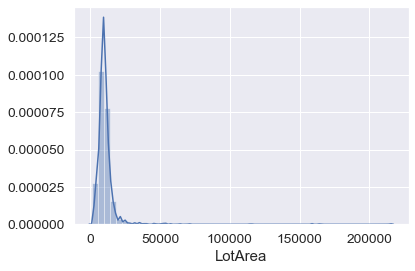

In [8]:
sns.distplot(df['LotArea'])
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


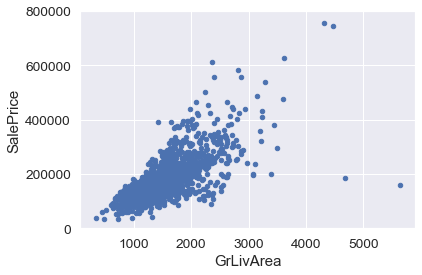

In [9]:
data = pd.concat([df['SalePrice'], df['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0, 800000))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


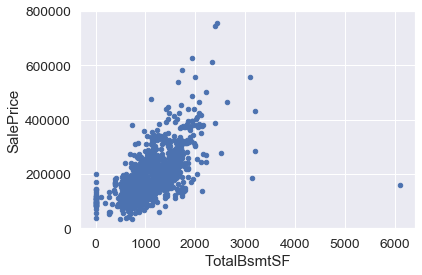

In [10]:
data = pd.concat([df['SalePrice'], df['TotalBsmtSF']], axis=1)
data.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0, 800000))

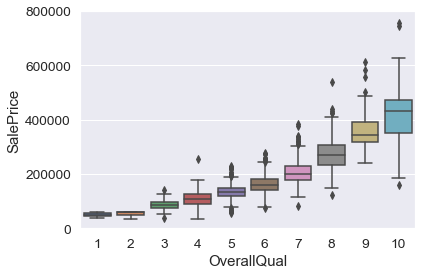

In [11]:
#box plot overallqual/saleprice
data = pd.concat([df['SalePrice'], df['OverallQual']], axis=1)
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

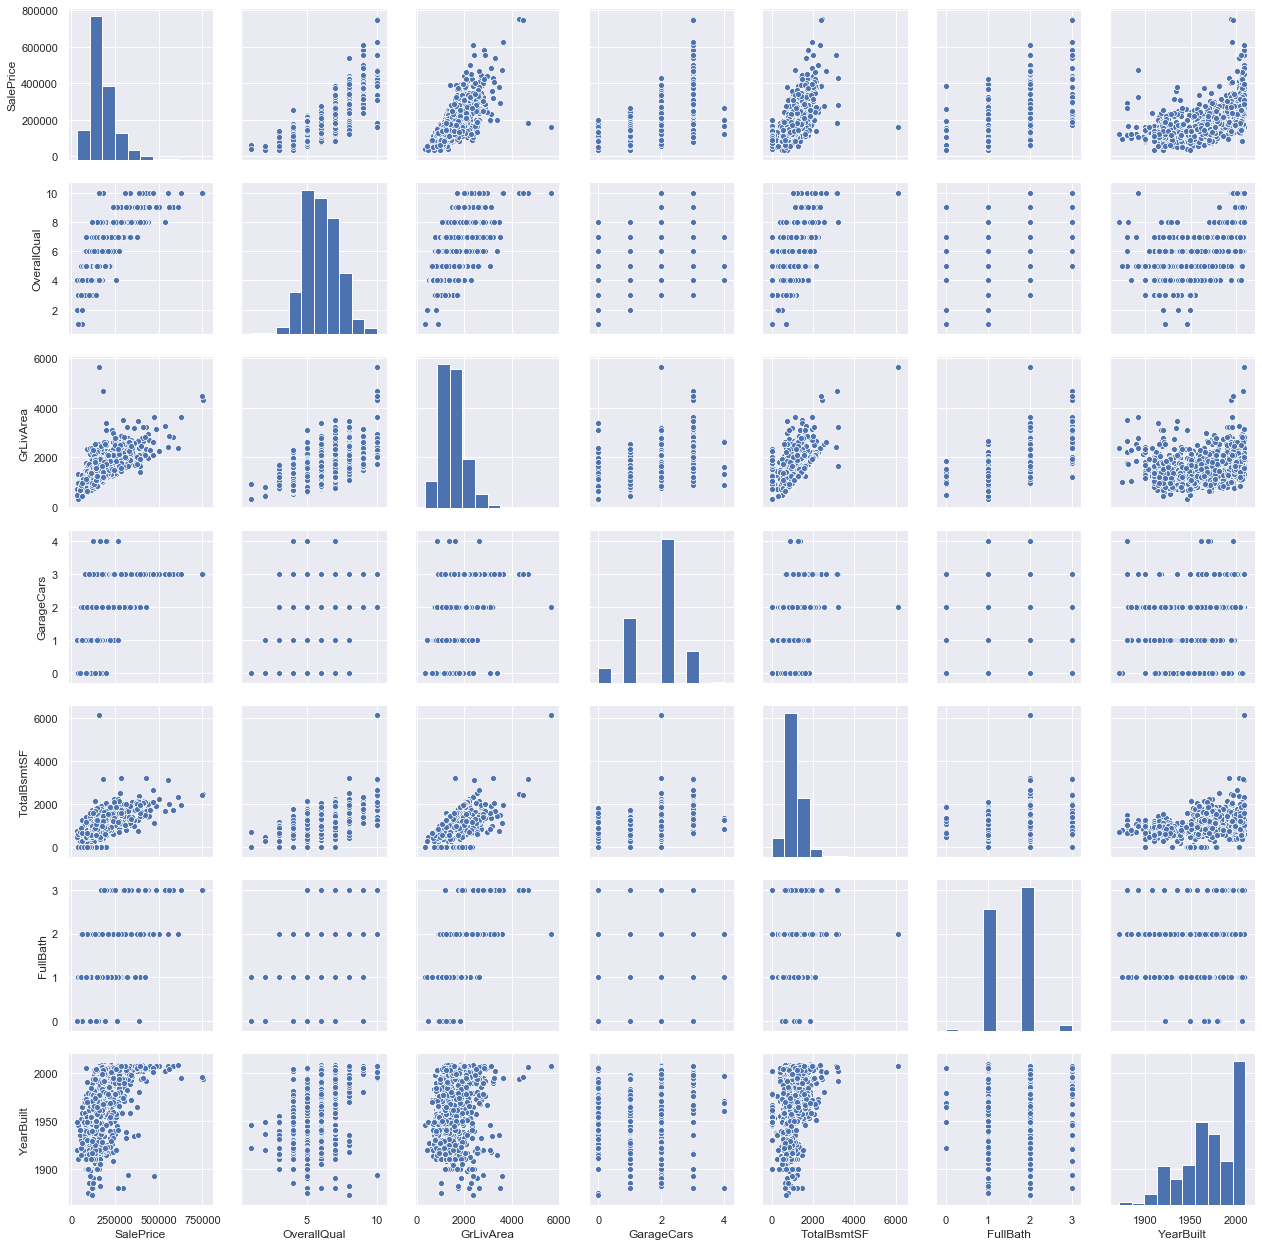

In [12]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols], height = 2.5)
plt.show();

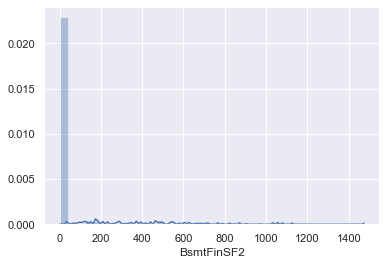

In [13]:
sns.distplot(df['BsmtFinSF2'])
plt.show()

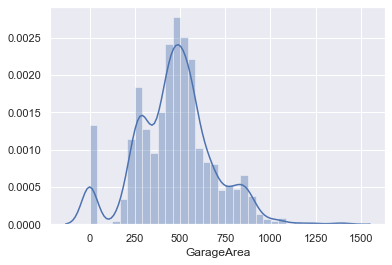

In [14]:
sns.distplot(df['GarageArea'])
plt.show()

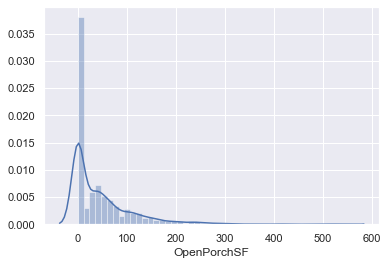

In [15]:
sns.distplot(df['OpenPorchSF'])
plt.show()

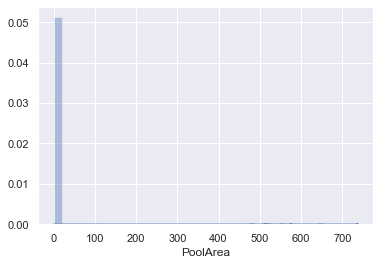

In [16]:
sns.distplot(df['PoolArea'])
plt.show()

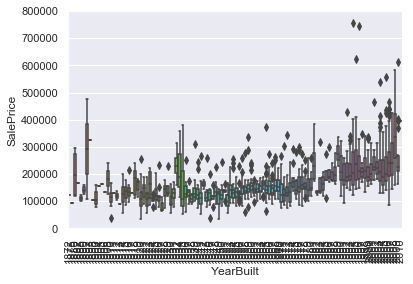

In [17]:
data = pd.concat([df['SalePrice'], df['YearBuilt']], axis=1)
fig = sns.boxplot(x='YearBuilt', y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

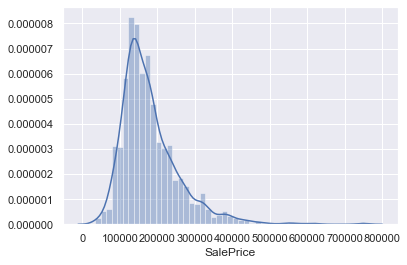

In [18]:
sns.distplot(df['SalePrice'])

In [19]:
print("Skewness: %f" % df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


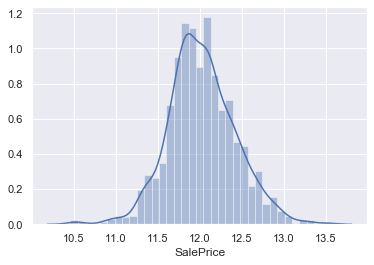

In [20]:
sns.distplot(np.log(df["SalePrice"]))

It appears that the target, SalePrice, is very skewed and a transformation like a logarithm would make it more normally distributed. Machine Learning models tend to work much better with normally distributed targets, rather than greatly skewed targets. By transforming the prices, we can boost model performance.

In [21]:
df["SalePrice"] = np.log(df["SalePrice"])

<a id = Section6></a>
## 6. Data Cleaning

In the context of data science and machine learning, data cleaning means filtering and modifying your data such that it is easier to explore, understand, and model. Filtering out the parts you don't want or need so that you don't need to look at or process them.

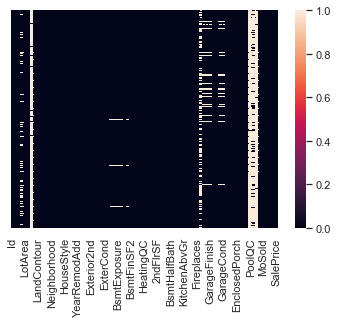

In [22]:
#Checking the heatmap for null values
sns.heatmap(df.isnull(), yticklabels=False)
plt.show()

In [23]:
df.isnull().sum(axis=0).sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
LotConfig           0
OverallCond         0
OverallQual         0
HouseStyle          0
BldgType            0
Condition2          0
BsmtFinSF1          0
MSZoning            0
LotArea             0
Street              0
Condition1          0
Neighborhood        0
LotShape            0
LandContour         0
LandSlope           0
SalePrice 

<a id = Section601></a>
### 6.1 Removing columns with maximum missing data

In [24]:
df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1, inplace=True)

<a id = Section602></a>
### 6.2 Filling missing data with mean/mode of their respective column

* The __mean__ is the average of a data set.
* The __mode__ is the most common number in a data set.
* The __median__ is the middle of the set of numbers.

In [25]:
print(df['LotFrontage'].dtype)

float64


In [26]:
print(df['LotFrontage'].mean())
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

70.04995836802665


In [27]:
print(df['GarageType'].dtype)

object


In [28]:
print(df['GarageType'].mode())
df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode()[0])

0    Attchd
dtype: object


In [29]:
print(df['GarageYrBlt'].dtype)

float64


In [30]:
print(df['GarageYrBlt'].mean())
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())

1978.5061638868744


In [31]:
print(df['GarageFinish'].dtype)

object


In [32]:
print(df['GarageFinish'].mode())
df['GarageFinish'] = df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])

0    Unf
dtype: object


In [33]:
print(df['GarageQual'].dtype)

object


In [34]:
print(df['GarageQual'].mode())
df['GarageQual'] = df['GarageQual'].fillna(df['GarageQual'].mode()[0])

0    TA
dtype: object


In [35]:
print(df['GarageCond'].dtype)

object


In [36]:
print(df['GarageCond'].mode())
df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode()[0])

0    TA
dtype: object


In [37]:
print(df['BsmtFinType2'].dtype)

object


In [38]:
print(df['BsmtFinType2'].mode())
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])

0    Unf
dtype: object


In [39]:
print(df['BsmtExposure'].dtype)

object


In [40]:
print(df['BsmtExposure'].mode())
df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])

0    No
dtype: object


In [41]:
print(df['BsmtFinType1'].dtype)

object


In [42]:
print(df['BsmtFinType1'].mode())
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])

0    Unf
dtype: object


In [43]:
print(df['BsmtCond'].dtype)

object


In [44]:
print(df['BsmtCond'].mode())
df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])

0    TA
dtype: object


In [45]:
print(df['BsmtQual'].dtype)

object


In [46]:
print(df['BsmtQual'].mode())
df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])

0    TA
dtype: object


In [47]:
print(df['MasVnrType'].dtype)

object


In [48]:
print(df['MasVnrType'].mode())
df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])

0    None
dtype: object


In [49]:
print(df['MasVnrArea'].dtype)

float64


In [50]:
print(df['MasVnrArea'].mean())
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mean())

103.68526170798899


In [51]:
print(df['Electrical'].dtype)

object


In [52]:
print(df['Electrical'].mode())
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

0    SBrkr
dtype: object


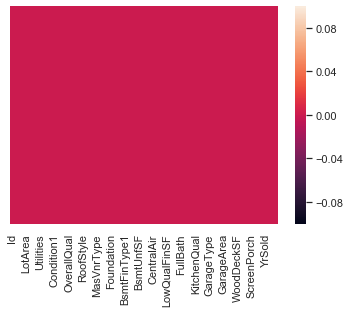

In [53]:
#Checking the heatmap for null values
sns.heatmap(df.isnull(), yticklabels=False)
plt.show()

In [54]:
df.isnull().sum(axis=0).sort_values(ascending=False)

SalePrice        0
ExterCond        0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
Foundation       0
SaleCondition    0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
YearRemodAdd     0
YearBuilt        0
OverallCond      0
OverallQual      0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
GarageYrBlt      0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal     

<a id = Section603></a>
### 6.3 Finding and removing outliers

An outlier is an observation that lies an abnormal distance from other values in a random sample from a population. In a sense, this definition leaves it up to the analyst (or a consensus process) to decide what will be considered abnormal. Before abnormal observations can be singled out, it is necessary to characterize normal observations.

In [55]:
##Removing outliers
def remove_outlier(house_temp, col_name_list):
    for col_name in col_name_list:
        Q1 = house_temp[col_name].quantile(0.25)
        Q3 = house_temp[col_name].quantile(0.75)
        IQR = Q3 - Q1
        lowerbound = house_temp[col_name].min()
        upperbound = Q3 + 1.5 * IQR
        print('Column',col_name,'has upperbound -',upperbound,'and lowerbound -',lowerbound)
        house_out = house_temp.loc[(house_temp[col_name] > lowerbound) & (house_temp[col_name] < upperbound)]
    return house_out

In [56]:
##Create a dataframe of house
col_list = ['MSSubClass','LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
           'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF',
           'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','SalePrice']
df = remove_outlier(df, col_list)

Column MSSubClass has upperbound - 145.0 and lowerbound - 20
Column LotFrontage has upperbound - 107.5 and lowerbound - 21.0
Column LotArea has upperbound - 17673.5 and lowerbound - 1300
Column MasVnrArea has upperbound - 410.625 and lowerbound - 0.0
Column BsmtFinSF1 has upperbound - 1780.625 and lowerbound - 0
Column BsmtFinSF2 has upperbound - 0.0 and lowerbound - 0
Column BsmtUnfSF has upperbound - 1685.5 and lowerbound - 0
Column TotalBsmtSF has upperbound - 2052.0 and lowerbound - 0
Column 1stFlrSF has upperbound - 2155.125 and lowerbound - 334
Column 2ndFlrSF has upperbound - 1820.0 and lowerbound - 0
Column LowQualFinSF has upperbound - 0.0 and lowerbound - 0
Column GrLivArea has upperbound - 2747.625 and lowerbound - 334
Column GarageArea has upperbound - 938.25 and lowerbound - 0
Column WoodDeckSF has upperbound - 420.0 and lowerbound - 0
Column OpenPorchSF has upperbound - 170.0 and lowerbound - 0
Column EnclosedPorch has upperbound - 0.0 and lowerbound - 0
Column 3SsnPorch 

<a id = Section7></a>
## 7. Feature engineering

__Feature engineering__ is the process of transforming raw __data__ into __features__ that better represent the underlying problem to the predictive models, resulting in improved model accuracy on unseen __data__. 

__Feature engineering__ turn your inputs into things the algorithm can understand.

In [57]:
## Check the correlation of columns
house_corr = df.corr(method='pearson').abs()
upper = house_corr.where(np.triu(np.ones(house_corr.shape), k=1).astype(np.bool))
upper

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,NaN,0.011887,0.015692,0.035066,0.035880,0.016877,0.018624,0.024603,0.060880,0.010305,0.003927,0.010879,0.023478,0.003133,0.002054,0.035440,0.000820,0.000750,0.019664,0.000486,0.001197,0.035681,0.003331,0.025519,0.022945,0.001909,0.012405,0.015041,0.037113,0.000200,0.004249,0.046612,0.009367,0.050553,0.006114,0.022149,0.004218,0.027733
MSSubClass,NaN,NaN,0.360854,0.141267,0.039133,0.062226,0.031328,0.042937,0.030055,0.063232,0.064784,0.143042,0.237978,0.252203,0.311054,0.044915,0.080604,0.006732,0.003234,0.135075,0.178945,0.029005,0.281618,0.043698,0.043044,0.083736,0.037832,0.097036,0.013007,0.001089,0.012257,0.044221,0.028290,0.007968,0.007942,0.013987,0.019878,0.072646
LotFrontage,NaN,NaN,NaN,0.307841,0.213144,0.051437,0.110769,0.074736,0.167234,0.203949,0.043497,0.116537,0.350072,0.403173,0.052549,0.032721,0.350577,0.089154,0.008466,0.163232,0.037051,0.233758,0.003600,0.308102,0.222788,0.054965,0.258007,0.314892,0.073779,0.133855,0.014408,0.064447,0.032643,0.155185,0.002132,0.014874,0.011642,0.318715
LotArea,NaN,NaN,NaN,NaN,0.089496,0.005020,0.008469,0.006780,0.080419,0.206015,0.114079,0.004311,0.254594,0.294265,0.031062,0.004558,0.247009,0.155304,0.047683,0.109920,0.005035,0.113202,0.016126,0.172828,0.267594,0.033383,0.143402,0.169374,0.160130,0.083916,0.015082,0.021649,0.027202,0.079420,0.039226,0.003542,0.015504,0.243690
OverallQual,NaN,NaN,NaN,NaN,NaN,0.092983,0.575940,0.548499,0.387857,0.215609,0.061598,0.302148,0.513512,0.446865,0.280026,0.054958,0.569594,0.105475,0.044819,0.536945,0.261741,0.097090,0.184821,0.400407,0.378445,0.513604,0.587159,0.546971,0.232472,0.310889,0.107762,0.033763,0.044126,0.043804,0.030456,0.084343,0.023258,0.807797
OverallCond,NaN,NaN,NaN,NaN,NaN,NaN,0.371642,0.076694,0.126056,0.038996,0.041197,0.139256,0.168567,0.142680,0.026708,0.000493,0.084240,0.051486,0.117447,0.194270,0.061215,0.010087,0.087808,0.059130,0.024555,0.306215,0.187534,0.152741,0.000050,0.034686,0.070751,0.025396,0.043869,0.003012,0.068917,0.003288,0.048363,0.034870
YearBuilt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.590743,0.309194,0.240568,0.050814,0.146189,0.383247,0.270486,0.005719,0.171482,0.192024,0.183510,0.039473,0.465043,0.239974,0.072009,0.175035,0.083387,0.141406,0.782294,0.535488,0.475753,0.220750,0.202880,0.386678,0.032301,0.045392,0.002655,0.034151,0.018130,0.016913,0.593416
YearRemodAdd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.168951,0.119529,0.068952,0.176278,0.280533,0.227479,0.135676,0.068412,0.280333,0.116457,0.012248,0.434267,0.177782,0.043456,0.148916,0.177708,0.102269,0.615415,0.412587,0.362657,0.203698,0.234852,0.190491,0.046311,0.047909,0.001215,0.009735,0.027057,0.035552,0.567332
MasVnrArea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.241474,0.071329,0.105034,0.334078,0.311238,0.149801,0.068779,0.355242,0.080610,0.015860,0.248180,0.190195,0.099050,0.034603,0.249212,0.231668,0.241402,0.349632,0.355784,0.140867,0.128464,0.107167,0.022550,0.062578,0.020903,0.029480,0.009526,0.011634,0.398144
BsmtFinSF1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.054204,0.506450,0.505989,0.426286,0.156378,0.059280,0.180891,0.651257,0.066455,0.039470,0.004870,0.104407,0.079982,0.019404,0.247301,0.140151,0.208918,0.284014,0.199723,0.111337,0.099942,0.028824,0.064710,0.117633,0.004945,0.010580,0.011150,0.352334


In [58]:
##Identify the highly co-related colums to drop
drop_col = [column for column in upper.columns if any(upper[column] > 0.8)]
drop_col

['1stFlrSF', 'TotRmsAbvGrd', 'GarageArea', 'SalePrice']

In [59]:
##Drop the columns - ['1stFlrSF', 'TotRmsAbvGrd', 'GarageArea']
df.drop(['1stFlrSF', 'TotRmsAbvGrd', 'GarageArea'], axis=1, inplace=True)
df.shape

(1446, 73)

In [60]:
##Drop Id column as Id does not impact on housing price
df.drop(['Id'], axis=1, inplace=True)
df.shape

(1446, 72)

In [61]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,854,0,1710,1,0,2,1,3,1,Gd,Typ,0,Attchd,2003.0,RFn,2,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,12.247694
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,0,0,1262,0,1,2,0,3,1,TA,Typ,1,Attchd,1976.0,RFn,2,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,12.109011
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,866,0,1786,1,0,2,1,3,1,Gd,Typ,1,Attchd,2001.0,RFn,2,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,12.317167
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,756,0,1717,1,0,1,0,3,1,Gd,Typ,1,Detchd,1998.0,Unf,3,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,11.849398
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1053,0,2198,1,0,2,1,4,1,Gd,Typ,1,Attchd,2000.0,RFn,3,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,12.429216


<a id = Section8></a>
## 8. Improving data quality

<a id = Section801></a>
### 8.1 Creating dummies
__The get_dummies() function is used to convert categorical variable into dummy/indicator variables.__

This function creates dummies for all the factors in the data frame supplied. Internally, it uses another __dummy()__ function which creates dummy variables for a single factor. The __dummy()__ function creates one new variable for every level of the factor for which we are creating dummies. It appends the variable name with the factor level name to generate names for the dummy variables.

In [62]:
##Creating dummies (one hot encoding) for the columns - MSZoning, LotShape, LandContour
dataframe = pd.get_dummies(df,columns=['MSZoning', 'LotShape','LandContour'],drop_first=True)
dataframe.head()

,MSSubClass,LotFrontage,LotArea,Street,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl
0,60,65.0,8450,Pave,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,854,0,1710,1,0,2,1,3,1,Gd,Typ,0,Attchd,2003.0,RFn,2,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,12.247694,0,0,1,0,0,0,1,0,0,1
1,20,80.0,9600,Pave,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,0,0,1262,0,1,2,0,3,1,TA,Typ,1,Attchd,1976.0,RFn,2,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,12.109011,0,0,1,0,0,0,1,0,0,1
2,60,68.0,11250,Pave,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,866,0,1786,1,0,2,1,3,1,Gd,Typ,1,Attchd,2001.0,RFn,2,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,12.317167,0,0,1,0,0,0,0,0,0,1
3,70,60.0,9550,Pave,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,756,0,1717,1,0,1,0,3,1,Gd,Typ,1,Detchd,1998.0,Unf,3,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,11.849398,0,0,1,0,0,0,0,0,0,1
4,60,84.0,14260,Pave,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1053,0,2198,1,0,2,1,4,1,Gd,Typ,1,Attchd,2000.0,RFn,3,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,12.429216,0,0,1,0,0,0,0,0,0,1


<a id = Section802></a>
### 8.2 Label Encoding

Another approach to encoding categorical values is to use a technique called label encoding. Label encoding is simply converting each value in a column to a number. For example, the __body_style__ column contains 5 different values. We could choose to encode it like this:

* convertible -> 0
* hardtop -> 1
* hatchback -> 2
* sedan -> 3
* wagon -> 4

In [63]:
def label_encode(x):
    return 1 if x == 'Pave' else 0

dataframe['Street_enc'] = dataframe['Street'].apply(label_encode)
dataframe.drop(['Street'],axis=1,inplace=True)

In [64]:
def label_encode(x):
    return 1 if x == 'AllPub' else 0

dataframe['Utilities_enc'] = dataframe['Utilities'].apply(label_encode)
dataframe.drop(['Utilities'],axis=1,inplace=True)

In [65]:
def label_encode(x):
    return 1 if (x == 'CulDSac' or x == 'FR3') else 0

dataframe['LotConfig_enc'] = dataframe['LotConfig'].apply(label_encode)
dataframe.drop(['LotConfig'],axis=1,inplace=True)

In [66]:
def label_encode(x):
    return 1 if (x == 'Mod' or x == 'Sev') else 0

dataframe['LandSlope_enc'] = dataframe['LandSlope'].apply(label_encode)
dataframe.drop(['LandSlope'],axis=1,inplace=True)

In [67]:
def label_encode(x):
    return 1 if (x == 'TwnhsE' or x == '1Fam') else 0

dataframe['BldgType_enc'] = dataframe['BldgType'].apply(label_encode)
dataframe.drop(['BldgType'],axis=1,inplace=True)

In [68]:
def label_encode(x):
    return 1 if x == 'Shed' else 0

dataframe['RoofStyle_enc'] = dataframe['RoofStyle'].apply(label_encode)
dataframe.drop(['RoofStyle'],axis=1,inplace=True)

In [69]:
def label_encode(x):
    return 1 if x == 'GLQ' else 0

dataframe['BsmtFinType1_enc'] = dataframe['BsmtFinType1'].apply(label_encode)
dataframe.drop(['BsmtFinType1'],axis=1,inplace=True)

In [70]:
def label_encode(x):
    return 1 if x == 'GLQ' else 0

dataframe['BsmtFinType2_enc'] = dataframe['BsmtFinType2'].apply(label_encode)
dataframe.drop(['BsmtFinType2'],axis=1,inplace=True)

In [71]:
def label_encode(x):
    if x == 'GasA':
        return 2
    elif (x == 'GasW' or x == 'OthW'):
        return 1
    else:
        return 0

dataframe['Heating_enc'] = dataframe['Heating'].apply(label_encode)
dataframe.drop(['Heating'],axis=1,inplace=True)

In [72]:
def label_encode(x):
    return 1 if x == 'Y' else 0

dataframe['CentralAir_enc'] = dataframe['CentralAir'].apply(label_encode)
dataframe.drop(['CentralAir'],axis=1,inplace=True)

In [73]:
def label_encode(x):
    if x == 'SBrkr':
        return 2
    elif (x == 'FuseA' or x == 'FuseF'):
        return 1
    else:
        return 0

dataframe['Electrical_enc'] = dataframe['Electrical'].apply(label_encode)
dataframe.drop(['Electrical'],axis=1,inplace=True)

In [74]:
def label_encode(x):
    if x == 'Typ':
        return 2
    elif x == 'Maj2':
        return 0
    else:
        return 1

dataframe['Functional_enc'] = dataframe['Functional'].apply(label_encode)
dataframe.drop(['Functional'],axis=1,inplace=True)

In [75]:
def label_encode(x):
    if x == 'Fin':
        return 3
    elif x == 'RFn':
        return 2
    elif x == 'Unf':
        return 1
    else:
        return 0

dataframe['GarageFinish_enc'] = dataframe['GarageFinish'].apply(label_encode)
dataframe.drop(['GarageFinish'],axis=1,inplace=True)

In [76]:
def label_encode(x):
    if x == 'Y':
        return 2
    elif x == 'P':
        return 1
    else:
        return 0

dataframe['PavedDrive_enc'] = dataframe['PavedDrive'].apply(label_encode)
dataframe.drop(['PavedDrive'],axis=1,inplace=True)

In [77]:
def label_encode(x):
    return 1 if x == 'Partial' else 0

dataframe['SaleCondition_enc'] = dataframe['SaleCondition'].apply(label_encode)
dataframe.drop(['SaleCondition'],axis=1,inplace=True)

In [78]:
def rating_label_encode(x):
    rating = ['NA','No','Mn','Av','Gd']
    for r in rating:
        if x == r:
            return rating.index(r)

update_features = ['BsmtExposure']

for f in update_features:
    dataframe[f + '_enc'] = dataframe[f].apply(rating_label_encode)
    dataframe.drop([f],axis=1,inplace=True)

In [79]:
def rating_label_encode(x):
    rating = ['NA','Po','Fa','TA','Gd','Ex']
    for r in rating:
        if x == r:
            return rating.index(r)

update_features = ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual',
                  'GarageQual','GarageCond']

for f in update_features:
    dataframe[f + '_enc'] = dataframe[f].apply(rating_label_encode)
    dataframe.drop([f],axis=1,inplace=True)

In [80]:
features = ['Neighborhood','Condition1','Condition2','HouseStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType',
           'Foundation','GarageType','SaleType']

for col in features:
    data = dataframe.groupby(col)['SalePrice'].median().sort_values()
    q1 = data.quantile(0.25)
    q2 = data.quantile(0.50)
    q3 = data.quantile(0.75)
    for i in range(len(data)):        
        nameIndex = data.index[i]
        nameValue = data[nameIndex]
        if nameValue >= q3 :
            dataframe.loc[(dataframe[col] == nameIndex),[col]] = 3
        elif (nameValue < q3 and nameValue > q2) :
            dataframe.loc[(dataframe[col] == nameIndex),[col]] = 2
        elif (nameValue <= q2 and nameValue > q1) :
            dataframe.loc[(dataframe[col] == nameIndex),[col]] = 1
        else:
            dataframe.loc[(dataframe[col] == nameIndex),[col]] = 0            

In [81]:
dataframe.head()

,MSSubClass,LotFrontage,LotArea,Neighborhood,Condition1,Condition2,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageType,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Street_enc,Utilities_enc,LotConfig_enc,LandSlope_enc,BldgType_enc,RoofStyle_enc,BsmtFinType1_enc,BsmtFinType2_enc,Heating_enc,CentralAir_enc,Electrical_enc,Functional_enc,GarageFinish_enc,PavedDrive_enc,SaleCondition_enc,BsmtExposure_enc,ExterQual_enc,ExterCond_enc,BsmtQual_enc,BsmtCond_enc,HeatingQC_enc,KitchenQual_enc,GarageQual_enc,GarageCond_enc
0,60,65.0,8450,2,1,2,3,7,5,2003,2003,1,3,3,2,196.0,3,706,0,150,856,854,0,1710,1,0,2,1,3,1,0,3,2003.0,2,0,61,0,0,0,0,0,2,2008,2,12.247694,0,0,1,0,0,0,1,0,0,1,1,1,0,0,1,0,1,0,2,1,2,2,2,2,0,1,4,3,4,3,5,4,3,3
1,20,80.0,9600,3,0,2,2,6,8,1976,1976,1,1,1,1,0.0,2,978,0,284,1262,0,0,1262,0,1,2,0,3,1,1,3,1976.0,2,298,0,0,0,0,0,0,5,2007,2,12.109011,0,0,1,0,0,0,1,0,0,1,1,1,0,0,1,0,0,0,2,1,2,2,2,2,0,4,3,3,4,3,5,3,3,3
2,60,68.0,11250,2,1,2,3,7,5,2001,2002,1,3,3,2,162.0,3,486,0,434,920,866,0,1786,1,0,2,1,3,1,1,3,2001.0,2,0,42,0,0,0,0,0,9,2008,2,12.317167,0,0,1,0,0,0,0,0,0,1,1,1,0,0,1,0,1,0,2,1,2,2,2,2,0,2,4,3,4,3,5,4,3,3
3,70,60.0,9550,3,1,2,3,7,5,1915,1970,1,1,0,1,0.0,0,216,0,540,756,756,0,1717,1,0,1,0,3,1,1,0,1998.0,3,0,35,272,0,0,0,0,2,2006,2,11.849398,0,0,1,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,2,1,2,2,1,2,0,1,3,3,3,4,4,4,3,3
4,60,84.0,14260,3,1,2,3,8,5,2000,2000,1,3,3,2,350.0,3,655,0,490,1145,1053,0,2198,1,0,2,1,4,1,1,3,2000.0,3,192,84,0,0,0,0,0,12,2008,2,12.429216,0,0,1,0,0,0,0,0,0,1,1,1,0,0,1,0,1,0,2,1,2,2,2,2,0,3,4,3,4,3,5,4,3,3


<a id = Section9></a>
## 9. Splitting data into training and evaluation sets

The data we use is usually split into training data and test data.

__Training Dataset:__ The sample of data used to fit the model.

__Validation Dataset:__ The sample of data used to provide an unbiased evaluation of a model fit on the training dataset while tuning model hyperparameters. The evaluation becomes more biased as skill on the validation dataset is incorporated into the model configuration.

__Test Dataset:__ The sample of data used to provide an unbiased evaluation of a final model fit on the training dataset.

<img src="test_train_split.png">

In [82]:
# separating our independent and dependent variable
X = dataframe.drop(['SalePrice'], axis=1)
y = dataframe["SalePrice"]

In [83]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=.20)

<a id = Section10></a>
# 10. Feature Scaling

Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. It is performed during the data pre-processing to handle highly varying magnitudes or values or units. If feature scaling is not done, then a machine learning algorithm tends to weigh greater values, higher and consider smaller values as the lower values, regardless of the unit of the values.

__Example:__ If an algorithm is not using feature scaling method then it can consider the value 3000 meter to be greater than 5 km but that’s actually not true and in this case, the algorithm will give wrong predictions. So, we use Feature Scaling to bring all values to same magnitudes and thus, tackle this issue.

__Techniques to perform Feature Scaling__

Consider the two most important ones:

* __Min-Max Normalization:__ This technique re-scales a feature or observation value with distribution value between 0 and 1.

<img src="min-max-normalisation.jpg">

* __Standardization:__ It is a very effective technique which re-scales a feature value so that it has distribution with 0 mean value and variance equals to 1.

<img src="standardisation.jpg">

In [84]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

<a id = Section11></a>
# 11. Building the Model

__Linear Regression__ is a machine learning algorithm based on __supervised learning__. It performs a __regression task__. Regression models a target prediction value based on independent variables. It is mostly used for finding out the relationship between variables and forecasting. Different regression models differ based on – the kind of relationship between dependent and independent variables, they are considering and the number of independent variables being used.

<img src="linear-regression-plot.jpg">

Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x). So, this regression technique finds out a linear relationship between x (input) and y(output). Hence, the name is Linear Regression.

In the figure above, X (input) is the work experience and Y (output) is the salary of a person. The regression line is the best fit line for our model.

__Hypothesis function for Linear Regression :__
<img src="linear-regression-hypothesis.jpg">

While training the model we are given :
__x__: input training data (univariate – one input variable(parameter))
__y__: labels to data (supervised learning)

When training the model – it fits the best line to predict the value of y for a given value of x. The model gets the best regression fit line by finding the best θ1 and θ2 values.
__θ1__: intercept
__θ2__: coefficient of x

Once we find the best θ1 and θ2 values, we get the best fit line. So when we are finally using our model for prediction, it will predict the value of y for the input value of x.

__How to update θ1 and θ2 values to get the best fit line ?__

__Cost Function (J):__

By achieving the best-fit regression line, the model aims to predict y value such that the error difference between predicted value and true value is minimum. So, it is very important to update the θ1 and θ2 values, to reach the best value that minimize the error between predicted y value (pred) and true y value (y).

<img src="LR-cost-function-1.jpg">
<img src="LR-cost-function-2.jpg">

Cost function(J) of Linear Regression is the __Root Mean Squared Error (RMSE)__ between predicted y value (pred) and true y value (y).

__Gradient Descent:__

To update θ1 and θ2 values in order to reduce Cost function (minimizing RMSE value) and achieving the best fit line the model uses Gradient Descent. The idea is to start with random θ1 and θ2 values and then iteratively updating the values, reaching minimum cost.

In [85]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [86]:
### Prediction
y_pred_train = linreg.predict(X_train)
pred = pd.DataFrame(y_pred_train)

y_pred_test = linreg.predict(X_test)
pred_test = pd.DataFrame(y_pred_test)

<a id = Section12></a>
# 12. Model Evaluation Metrics

__Model evaluation__ aims to estimate the generalization accuracy of a __model__ on future (unseen/out-of-sample) data. Methods for __evaluating__ a __model's__ performance are divided into 2 categories: namely, holdout and Cross-validation. Both methods use a test set (i.e data not seen by the __model__) to __evaluate model__ performance.

Root Mean Square Error (RMSE) is a standard way to measure the error of a model in predicting quantitative data. 

Formally it is defined as follows:

<img src="RMSE.png" />

__RMSE: Root Mean Square Error__ is the measure of how well a regression line fits the data points. RMSE can also be construed as Standard Deviation in the residuals.

In [87]:
### RMSE Metrics
from sklearn import metrics

# Calculated Train RMSE
calculated_train_rmse = np.sqrt(metrics.mean_absolute_error(y_train, y_pred_train))
print('Calculated Train RMSE is {}'.format(calculated_train_rmse))

# Calculated Test RMSE
calculated_test_rmse = np.sqrt(metrics.mean_absolute_error(y_test, y_pred_test))
print('Calculated Test RMSE is {}'.format(calculated_test_rmse))

Calculated Train RMSE is 0.297564606281447
Calculated Test RMSE is 0.29502104938445906


__R-squared__ is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression.

The definition of R-squared is fairly straight-forward; it is the percentage of the response variable variation that is explained by a linear model. Or:

__R-squared = Explained variation / Total variation__

R-squared is always between 0 and 100%:
* 0% indicates that the model explains none of the variability of the response data around its mean.
* 100% indicates that the model explains all the variability of the response data around its mean.

In general, the higher the R-squared, the better the model fits your data. 

R2 shows how well terms (data points) fit a curve or line.

In [88]:
from sklearn.metrics import r2_score

# Calculated Train R-squared
calculated_train_r_squared = r2_score(y_train, y_pred_train)
print('Calculated Train R-squared is {}'.format(calculated_train_r_squared))

# Calculated Test R-squared
calculated_test_r_squared = r2_score(y_test, y_pred_test)
print('Calculated Test R-squared is {}'.format(calculated_test_r_squared))

Calculated Train R-squared is 0.8896102116033099
Calculated Test R-squared is 0.9093618210786856


__Adjusted r-square__ is a modified form of __r-square__ whose value increases if new predictors tend to improve model's performance and decreases if new predictors does not improve performance as expected.

__Adjusted R2__ also indicates how well terms fit a curve or line, but adjusts for the number of terms in a model. If you add more and more useless variables to a model, adjusted r-squared will decrease. 

If you add more useful variables, adjusted r-squared will increase.

Adjusted R2 will always be less than or equal to R2.

The formula is:

<img src="r-squared-adjusted.jpg" />

where:

* N is the number of points in your data sample.
* K is the number of independent regressors, i.e. the number of variables in your model, excluding the constant.

In [91]:
1 - ((1 - calculated_train_r_squared) * (X_train.shape[0] - 1) / (X_train.shape[0] - X_train.shape[1] - 1))

0.8816154079868366

In [92]:
1 - ((1 - calculated_test_r_squared) * (X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1))

0.87585576441583